# Project: Investigate a Dataset ( No-show appointments)


## Introduction
This dataset is about information collected from about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. I will be looking for the characteristics of people who do not show up for appointments.
I will be looking for answers to the following questions 
> What is the general no-show percentage    
> Do people on the scholarship program have a lower no-show rate than the others?  
> Which neighborhood has the lowest/highest appointments and the lowest/highest no_show proportion on record.    
> Which day of the week has the lowest/highest appointments and the lowest/highest no_show proportion on record  
> Do people who get SMS reminders have a lower no-show rate than those who do not

In [1]:
# Import everything that will be needed for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data and clean the dataset for analysis. 

### General Properties
> Perform operations to import and inspect data and look for instances of missing or possibly errant data.

In [2]:
# Load the data and print out first few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62    MATA DA PRAIA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No

Perform operations to inspect data and look for instances of missing or possibly errant data.

In [3]:
# check the number of rows and columns

df.shape

(110527, 14)

This dataframe has 110527 rows and 14 columns  
I will use the df.info() to get general information of the data set (column names, data types, nulls)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Verify the presence or absence of nulls with isnull

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Data Cleaning 
There are no null values which is good but Data types for PatientId, ScheduledDay, and AppointmentDay columns need to be corrected so that their values can be well displayed. Looking at the data, no column will be dropped even thought the AppointmentDay column is not necessary. Given that the information the AppointmentDay column contains is available in the ScheduledDay column, I will use the AppointmentDay column to extract the week-day of the appointment and then rename it. I will be cleaning the data following the steps below; 

> A). Correct the data types    
> B). Rename some columns   
> C). Check for duplicated rows   
> D). Set index    
> E). check for and correct any erranrt data  

#### A). Correct the data types 
> The data type for AppointmentDay and ScheduledDay is Object. This needs to be corrected to datetime. These corrections will correct the display of the values in the cells of these columns. The No-show column needs to display True for no show and False if the patient showed up.

In [6]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['PatientId'] = df['PatientId'].astype(np.int64)


A = {'Yes': True, 'No': False}
df['No-show'] = df['No-show'].map(A)

df.head(3)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0   29872499824296        5642903      F 2016-04-29 18:38:08     2016-04-29   
1  558997776694438        5642503      M 2016-04-29 16:08:27     2016-04-29   
2    4262962299951        5642549      F 2016-04-29 16:19:04     2016-04-29   

   Age    Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0   62  JARDIM DA PENHA            0             1         0           0   
1   56  JARDIM DA PENHA            0             0         0           0   
2   62    MATA DA PRAIA            0             0         0           0   

   Handcap  SMS_received  No-show  
0        0             0    False  
1        0             0    False  
2        0             0    False

#### B). Rename some columns
> First extract week day of appointment from AppointmentDay column  
> Rename the following columns PatientId, AppointmentID, ScheduledDay, AppointmentDay, Handcap, and No-show 

In [7]:
# Extract week day of appointment from AppointmentDay column

df['AppointmentDay'] = df['AppointmentDay'].dt.weekday_name

# display the first few rows of the dataframe

df.head(3)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0   29872499824296        5642903      F 2016-04-29 18:38:08         Friday   
1  558997776694438        5642503      M 2016-04-29 16:08:27         Friday   
2    4262962299951        5642549      F 2016-04-29 16:19:04         Friday   

   Age    Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0   62  JARDIM DA PENHA            0             1         0           0   
1   56  JARDIM DA PENHA            0             0         0           0   
2   62    MATA DA PRAIA            0             0         0           0   

   Handcap  SMS_received  No-show  
0        0             0    False  
1        0             0    False  
2        0             0    False

In [8]:
# Rename the following columns PatientId, AppointmentID, ScheduledDay, AppointmentDay, Handcap, and No-show

df.rename(columns = {'ScheduledDay':'Appointment_Day', 'AppointmentDay':'Week_Day', 'AppointmentID':'Appointment_ID', 
                     'PatientId':'Patient_ID', 'Handcap':'Handicap', 
                     'Hipertension':'Hypertension', 'No-show':'No_Show'}, inplace = True)

# display the first few rows of the dataframe

df.head(3)

Patient_ID  Appointment_ID Gender     Appointment_Day Week_Day  Age  \
0   29872499824296         5642903      F 2016-04-29 18:38:08   Friday   62   
1  558997776694438         5642503      M 2016-04-29 16:08:27   Friday   56   
2    4262962299951         5642549      F 2016-04-29 16:19:04   Friday   62   

     Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   
1  JARDIM DA PENHA            0             0         0           0         0   
2    MATA DA PRAIA            0             0         0           0         0   

   SMS_received  No_Show  
0             0    False  
1             0    False  
2             0    False

#### C). Check for duplicate rows

In [9]:
df.duplicated().sum()

0

There are no duplicated rows.

#### D). Set index

In [10]:
# The Appointment_ID looks good for an index column

df.Appointment_ID.duplicated().sum()

0

In [11]:
df.Appointment_ID.isnull().sum()

0

In [12]:
# Set the Appointment_ID column as the index column

df.set_index('Appointment_ID', inplace=True)

df.head(2)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5642903          29872499824296      F 2016-04-29 18:38:08   Friday   62   
5642503         558997776694438      M 2016-04-29 16:08:27   Friday   56   

                  Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                         
5642903         JARDIM DA PENHA            0             1         0   
5642503         JARDIM DA PENHA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5642903                  0         0             0    False  
5642503                  0         0             0    False

#### E). check for and correct any erranrt data

In [13]:
df.describe()

Patient_ID            Age    Scholarship   Hypertension  \
count  1.105270e+05  110527.000000  110527.000000  110527.000000   
mean   1.474963e+14      37.088874       0.098266       0.197246   
std    2.560949e+14      23.110205       0.297675       0.397921   
min    3.921700e+04      -1.000000       0.000000       0.000000   
25%    4.172614e+12      18.000000       0.000000       0.000000   
50%    3.173184e+13      37.000000       0.000000       0.000000   
75%    9.439172e+13      55.000000       0.000000       0.000000   
max    9.999816e+14     115.000000       1.000000       1.000000   

            Diabetes     Alcoholism       Handicap   SMS_received  
count  110527.000000  110527.000000  110527.000000  110527.000000  
mean        0.071865       0.030400       0.022248       0.321026  
std         0.258265       0.171686       0.161543       0.466873  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       1.000000  
max         1.000000       1.000000       4.000000       1.000000

From the above result, the minimum age is -1. More detail look is needed. the maximum age of 115 years is possible so I don't think it needs correction but I will still have to confirm

In [14]:
df[df.Age < 0]

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5775010         465943158731293      F 2016-06-06 08:58:13   Monday   -1   

               Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
Appointment_ID                                                                  
5775010                ROMÃO            0             0         0           0   

                Handicap  SMS_received  No_Show  
Appointment_ID                                   
5775010                0             0    False

Check to see if the Patient_ID linked with this negative age has other entries and see what the age is

In [15]:
df[df.Patient_ID == 465943158731293]

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5775010         465943158731293      F 2016-06-06 08:58:13   Monday   -1   

               Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
Appointment_ID                                                                  
5775010                ROMÃO            0             0         0           0   

                Handicap  SMS_received  No_Show  
Appointment_ID                                   
5775010                0             0    False

only one entry is found with the above patient ID. It can either be dropped or modified. Since every other entry of this Patient's ID looks good, will consider the negative sign as a mistake and will take the negative sign away

In [16]:
df.loc[5775010, 'Age'] = 1

# Verify to see that it was corrected

df[df.Patient_ID == 465943158731293]

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5775010         465943158731293      F 2016-06-06 08:58:13   Monday    1   

               Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
Appointment_ID                                                                  
5775010                ROMÃO            0             0         0           0   

                Handicap  SMS_received  No_Show  
Appointment_ID                                   
5775010                0             0    False

Check to see those ages above 100 years if they need attention

In [17]:
df[df.Age > 100]

Patient_ID Gender     Appointment_Day  Week_Day  Age  \
Appointment_ID                                                              
5651757         976294799775439      F 2016-05-03 09:14:53   Tuesday  102   
5700278          31963211613981      F 2016-05-16 09:17:44  Thursday  115   
5700279          31963211613981      F 2016-05-16 09:17:44  Thursday  115   
5562812          31963211613981      F 2016-04-08 14:29:17    Monday  115   
5744037          31963211613981      F 2016-05-30 09:44:51    Monday  115   
5751563            234283596548      F 2016-05-31 10:19:49  Thursday  102   
5717451         748234579244724      F 2016-05-19 07:57:56    Friday  115   

               Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
Appointment_ID                                                                  
5651757            CONQUISTA            0             0         0           0   
5700278           ANDORINHAS            0             0         0           0   
5700279           ANDORINHAS            0             0         0           0   
5562812           ANDORINHAS            0             0         0           0   
5744037           ANDORINHAS            0             0         0           0   
5751563          MARIA ORTIZ            0             0         0           0   
5717451             SÃO JOSÉ            0             1         0           0   

                Handicap  SMS_received  No_Show  
Appointment_ID                                   
5651757                0             0    False  
5700278                1             0     True  
5700279                1             0     True  
5562812                1             0     True  
5744037                1             0    False  
5751563                0             0    False  
5717451                0             1    False

It is possible to have some people who are  115 years old. So I will leave these entries as is. 

## Exploratory Data Analysis

### Research Question 1: What is the general no-show percentage?

I will divide the dataframe into two seperate dataframes. Those who show up for their appoiniment (df_Present) represented by "No" in the "No_Show" column and those who do not show up (df_Absent) represented by "Yes" in the "No_Show" column

In [18]:
df_Present = df[df.No_Show == 0]
df_Absent = df[df.No_Show == 1]

# Display the first few rows of those who showup for their appointment

df_Present.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5642903          29872499824296      F 2016-04-29 18:38:08   Friday   62   
5642503         558997776694438      M 2016-04-29 16:08:27   Friday   56   
5642549           4262962299951      F 2016-04-29 16:19:04   Friday   62   

                  Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                         
5642903         JARDIM DA PENHA            0             1         0   
5642503         JARDIM DA PENHA            0             0         0   
5642549           MATA DA PRAIA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5642903                  0         0             0    False  
5642503                  0         0             0    False  
5642549                  0         0             0    False

In [19]:
df_Absent.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5630279         733688164476661      F 2016-04-27 15:05:12   Friday   23   
5630575           3449833394123      F 2016-04-27 15:39:58   Friday   39   
5620163           7542951368435      M 2016-04-26 08:44:12   Friday   29   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5630279             GOIABEIRAS            0             0         0   
5630575             GOIABEIRAS            0             0         0   
5620163         NOVA PALESTINA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5630279                  0         0             0     True  
5630575                  0         0             0     True  
5620163                  0         0             1     True

> Let Y represent the number of appointments that the patient was present (Showed up)  
> Let N represent the number of appointments that the patient was absent (No Show)  
> Let T represent the total number of appointments  
> Let PY represent the percentage of appointments that the patient showed up  
> Let PN represent the percentage of appointments that the patient did not show  

In [20]:
Y = df_Present.shape[0] # This is the number of rows in df_Present
N = df_Absent.shape[0]  # This is the number of rows in df_Absent
T = df.shape[0]         # This is the number of rows in df

PY = str(round((Y / T) * 100)) # Make it a string so that it will be easy to concatenate it with other strings.
PN = str(round((N / T) * 100))

print ("Generally, " + PN + "% of patients' appointments are recorded as no_show")
print("Generally, " + PY + "% of patients' appointments are honored")

Generally, 20% of patients' appointments are recorded as no_show
Generally, 80% of patients' appointments are honored


Below is the presentation of the above finding in a pie chart

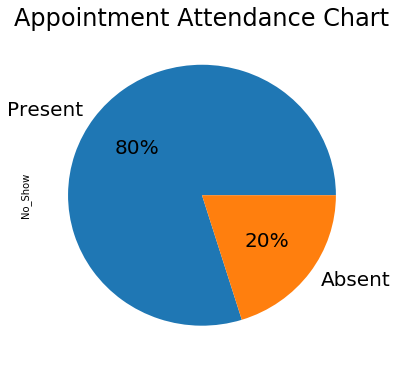

In [21]:
labels = ['Present', 'Absent']
df.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart', fontsize=24);

### Research Question 2:  Do people on the scholarship program have a lower no-show rate than the others?

> I will sort out the data of people on the Scholarship program and call it df_Scholarship    
> Those who are not on scholarship, I will call it df_No_Scholarship   
> Those on the Scholarship program who went for their appointment, I will call df_S_Present    
> Those on the Scholarship program who did not go for their appointment, I will call df_S_Absent   
> Those who are not on the Scholarship program that went for their appointment, i will call df_NS_Present    
> Those who are on the Scholarship program that did not go for their appointment, I will call df_NS_Absent   

In [22]:
# Create 2 dataframes. One for those on the scholarship program and the other for those who are not on the program
df_Scholarship = df[df.Scholarship == 1]
df_No_Scholarship = df[df.Scholarship == 0]

df_Scholarship.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5634718         566654781423437      F 2016-04-28 11:33:51   Friday   22   
5633460          14794966191172      F 2016-04-28 09:28:57   Friday   40   
5621836          17135378245248      F 2016-04-26 10:54:18   Friday   30   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5634718         NOVA PALESTINA            1             0         0   
5633460              CONQUISTA            1             0         0   
5621836         NOVA PALESTINA            1             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5634718                  0         0             0    False  
5633460                  0         0             0     True  
5621836                  0         0             1    False

In [23]:
df_No_Scholarship.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5642903          29872499824296      F 2016-04-29 18:38:08   Friday   62   
5642503         558997776694438      M 2016-04-29 16:08:27   Friday   56   
5642549           4262962299951      F 2016-04-29 16:19:04   Friday   62   

                  Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                         
5642903         JARDIM DA PENHA            0             1         0   
5642503         JARDIM DA PENHA            0             0         0   
5642549           MATA DA PRAIA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5642903                  0         0             0    False  
5642503                  0         0             0    False  
5642549                  0         0             0    False

> Patients on scholarship who showed up for appointment df_S_Present   
> Patients on scholarship who did not show up for appointment df_S_Absent  
> Patients NOT on scholarship who showed up for appointment df_NS_Present  
> Patients NOT on scholarship who did not show up for appointment df_NS_Absent  


In [24]:
# Patients on scholarship who showed up for appointment
df_S_Present = df_Scholarship[df_Scholarship.No_Show == 0]

# Patients on scholarship who did not show up for appointment
df_S_Absent = df_Scholarship[df_Scholarship.No_Show == 1]

# Patients NOT on scholarship who showed up for appointment
df_NS_Present = df_No_Scholarship[df_No_Scholarship.No_Show == 0]

# Patients NOT on scholarship who did not show up for appointment
df_NS_Absent = df_No_Scholarship[df_No_Scholarship.No_Show == 1]

df_S_Present.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5634718         566654781423437      F 2016-04-28 11:33:51   Friday   22   
5621836          17135378245248      F 2016-04-26 10:54:18   Friday   30   
5616921           7653516999712      F 2016-04-25 15:01:04   Friday   38   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5634718         NOVA PALESTINA            1             0         0   
5621836         NOVA PALESTINA            1             0         0   
5616921          SÃO CRISTÓVÃO            1             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5634718                  0         0             0    False  
5621836                  0         0             1    False  
5616921                  0         0             1    False

In [25]:
df_S_Absent.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                            
5633460         14794966191172      F 2016-04-28 09:28:57   Friday   40   
5628907           311284853849      M 2016-04-27 12:07:14   Friday   12   
5534635         46946985511333      F 2016-03-31 17:05:31   Friday   23   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5633460              CONQUISTA            1             0         0   
5628907         NOVA PALESTINA            1             0         0   
5534635         GRANDE VITÓRIA            1             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5633460                  0         0             0     True  
5628907                  0         0             0     True  
5534635                  0         0             1     True

In [26]:
df_NS_Present.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5642903          29872499824296      F 2016-04-29 18:38:08   Friday   62   
5642503         558997776694438      M 2016-04-29 16:08:27   Friday   56   
5642549           4262962299951      F 2016-04-29 16:19:04   Friday   62   

                  Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                         
5642903         JARDIM DA PENHA            0             1         0   
5642503         JARDIM DA PENHA            0             0         0   
5642549           MATA DA PRAIA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5642903                  0         0             0    False  
5642503                  0         0             0    False  
5642549                  0         0             0    False

In [27]:
df_NS_Absent.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5630279         733688164476661      F 2016-04-27 15:05:12   Friday   23   
5630575           3449833394123      F 2016-04-27 15:39:58   Friday   39   
5620163           7542951368435      M 2016-04-26 08:44:12   Friday   29   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5630279             GOIABEIRAS            0             0         0   
5630575             GOIABEIRAS            0             0         0   
5620163         NOVA PALESTINA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5630279                  0         0             0     True  
5630575                  0         0             0     True  
5620163                  0         0             1     True

> Let S represent the number of scholarship patients that were present (Showed up) for their appointment  
> Let N_S represent the number of scholarship patients that were not present (no Show) for their appointment  
> Let T_S represent the total number of scholarship patients' appointments  
> Let PS represent the percentage of scholarship patients' appointments that the patient showed up  
> Let PN_S represent the percentage of scholarship patients' appointments that the patient did not show  


In [28]:
S = df_S_Present.shape[0] # This is the number of rows in df_S_Present
N_S = df_S_Absent.shape[0]  # This is the number of rows in df_S_Absent
T_S = df_Scholarship.shape[0]         # This is the number of rows in df_Scholarship


PS = str(round((S / T_S) * 100)) # Make it a string so that it will be easy to concatenate it with other strings.
PN_S = str(round((N_S / T_S) * 100))

print (PN_S + "% of appointments from patients who are on the scholarship program was not honored")
print(PS + "% of appointments from patients who are on the scholarship program was honored")
print(str(T_S) + " is the total number of appointments by patients on scholarship.")

24% of appointments from patients who are on the scholarship program was not honored
76% of appointments from patients who are on the scholarship program was honored
10861 is the total number of appointments by patients on scholarship.


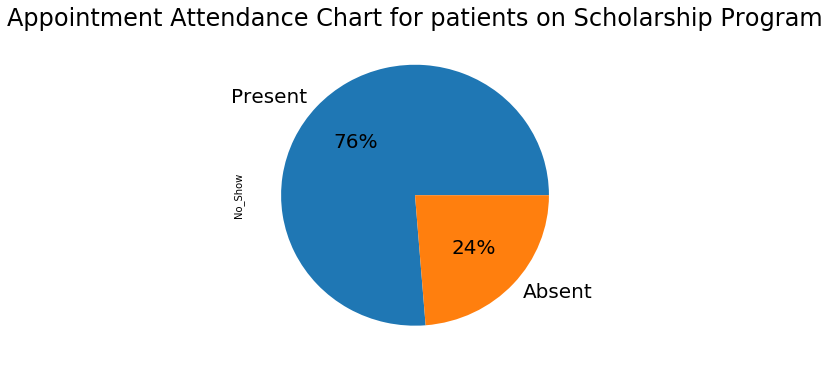

In [29]:
labels = ['Present', 'Absent']
df_Scholarship.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for patients on Scholarship Program', fontsize=24);

> Let Non_S represent the number of non-scholarship patients that Showed up for their appointment  
> Let Non_N_S represent the number of non-scholarship patients that din not Show up for their appointment  
> Let Non_T_S represent the total number of non-scholarship patients' appointments  
> Let Non_PS represent the percentage of non-scholarship patients' appointments that the patient showed up  
> Let Non_PN_S represent the percentage of non-scholarship patients' appointments that the patient did not show  

In [30]:
Non_S = df_NS_Present.shape[0] # This is the number of rows in df_NS_Present
Non_N_S = df_NS_Absent.shape[0]  # This is the number of rows in df_NS_Absent
Non_T_S = df_No_Scholarship.shape[0]         # This is the number of rows in df_No_Scholarship

Non_PS = str(round((Non_S / Non_T_S) * 100)) # Make it a string so that it will be easy to concatenate it with other strings.
Non_PN_S = str(round((Non_N_S / Non_T_S) * 100))

print (Non_PN_S + "% of appointments from patients who are NOT on the scholarship program was recorded as no show")
print(Non_PS + "% of appointments from patients who are NOT on the scholarship program was honored")
print(str(Non_T_S) + " is the total number of appointments by non-scholarship patients")

20% of appointments from patients who are NOT on the scholarship program was recorded as no show
80% of appointments from patients who are NOT on the scholarship program was honored
99666 is the total number of appointments by non-scholarship patients


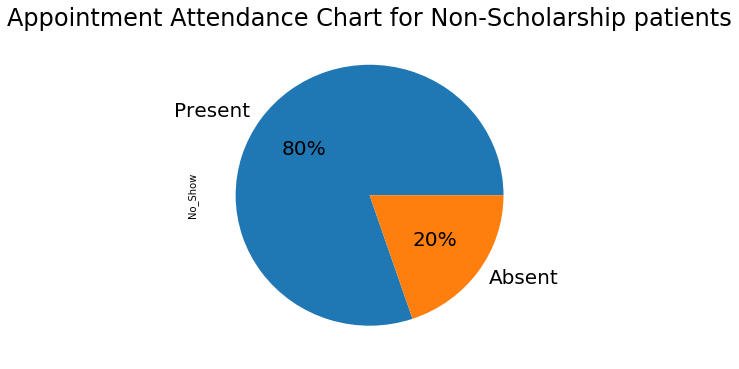

In [31]:
labels = ['Present', 'Absent']
df_No_Scholarship.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for Non-Scholarship patients', fontsize=24);

### Research Question 3: Which neighborhood has the lowest/highest appointments and the lowest/highest no_show proportion on record?     

Make a new dataframe called df_Neighbourhood.

In [32]:
df_Neighbourhood = df.groupby(['Neighbourhood','No_Show']).size().unstack().reset_index()
df_Neighbourhood

No_Show        Neighbourhood   False   True
0                  AEROPORTO     7.0    1.0
1                 ANDORINHAS  1741.0  521.0
2            ANTÔNIO HONÓRIO   221.0   50.0
3        ARIOVALDO FAVALESSA   220.0   62.0
4             BARRO VERMELHO   332.0   91.0
5                 BELA VISTA  1523.0  384.0
6             BENTO FERREIRA   665.0  193.0
7                  BOA VISTA   254.0   58.0
8                     BONFIM  2223.0  550.0
9                  CARATOÍRA  1974.0  591.0
10                    CENTRO  2631.0  703.0
11                   COMDUSA   254.0   56.0
12                 CONQUISTA   689.0  160.0
13                CONSOLAÇÃO  1139.0  237.0
14                CRUZAMENTO  1094.0  304.0
15                  DA PENHA  1788.0  429.0
16                DE LOURDES   258.0   47.0
17                 DO CABRAL   472.0   88.0
18                DO MOSCOSO   321.0   92.0
19                 DO QUADRO   709.0  140.0
20            ENSEADA DO SUÁ   183.0   52.0
21                ESTRELINHA   432.0  106.0
22              FONTE GRANDE   533.0  149.0
23            FORTE SÃO JOÃO  1543.0  346.0
24                 FRADINHOS   210.0   48.0
25                GOIABEIRAS   563.0  137.0
26            GRANDE VITÓRIA   854.0  217.0
27                  GURIGICA  1562.0  456.0
28                     HORTO   133.0   42.0
29         ILHA DAS CAIEIRAS   836.0  235.0
..                       ...     ...    ...
51         PARQUE INDUSTRIAL     1.0    NaN
52            PARQUE MOSCOSO   623.0  179.0
53                   PIEDADE   364.0   88.0
54         PONTAL DE CAMBURI    57.0   12.0
55            PRAIA DO CANTO   845.0  190.0
56              PRAIA DO SUÁ   994.0  294.0
57                  REDENÇÃO  1278.0  275.0
58                 REPÚBLICA   692.0  143.0
59               RESISTÊNCIA  3525.0  906.0
60                     ROMÃO  1741.0  474.0
61             SANTA CECÍLIA   325.0  123.0
62               SANTA CLARA   372.0  134.0
63              SANTA HELENA   141.0   37.0
64               SANTA LUÍZA   351.0   77.0
65               SANTA LÚCIA   352.0   86.0
66              SANTA MARTHA  2635.0  496.0
67              SANTA TEREZA  1060.0  272.0
68               SANTO ANDRÉ  2063.0  508.0
69             SANTO ANTÔNIO  2262.0  484.0
70             SANTOS DUMONT   907.0  369.0
71               SANTOS REIS   435.0  112.0
72          SEGURANÇA DO LAR   117.0   28.0
73              SOLON BORGES   400.0   69.0
74              SÃO BENEDITO  1152.0  287.0
75             SÃO CRISTÓVÃO  1473.0  363.0
76                  SÃO JOSÉ  1549.0  428.0
77                 SÃO PEDRO  1933.0  515.0
78                TABUAZEIRO  2559.0  573.0
79             UNIVERSITÁRIO   120.0   32.0
80                VILA RUBIM   710.0  141.0

[81 rows x 3 columns]

Use fillna to replace Nan values in row 52 (denoted by 51 in the index) with 0.0

In [33]:
df_Neighbourhood.fillna(0.0, inplace=True)
df_Neighbourhood

No_Show        Neighbourhood   False   True
0                  AEROPORTO     7.0    1.0
1                 ANDORINHAS  1741.0  521.0
2            ANTÔNIO HONÓRIO   221.0   50.0
3        ARIOVALDO FAVALESSA   220.0   62.0
4             BARRO VERMELHO   332.0   91.0
5                 BELA VISTA  1523.0  384.0
6             BENTO FERREIRA   665.0  193.0
7                  BOA VISTA   254.0   58.0
8                     BONFIM  2223.0  550.0
9                  CARATOÍRA  1974.0  591.0
10                    CENTRO  2631.0  703.0
11                   COMDUSA   254.0   56.0
12                 CONQUISTA   689.0  160.0
13                CONSOLAÇÃO  1139.0  237.0
14                CRUZAMENTO  1094.0  304.0
15                  DA PENHA  1788.0  429.0
16                DE LOURDES   258.0   47.0
17                 DO CABRAL   472.0   88.0
18                DO MOSCOSO   321.0   92.0
19                 DO QUADRO   709.0  140.0
20            ENSEADA DO SUÁ   183.0   52.0
21                ESTRELINHA   432.0  106.0
22              FONTE GRANDE   533.0  149.0
23            FORTE SÃO JOÃO  1543.0  346.0
24                 FRADINHOS   210.0   48.0
25                GOIABEIRAS   563.0  137.0
26            GRANDE VITÓRIA   854.0  217.0
27                  GURIGICA  1562.0  456.0
28                     HORTO   133.0   42.0
29         ILHA DAS CAIEIRAS   836.0  235.0
..                       ...     ...    ...
51         PARQUE INDUSTRIAL     1.0    0.0
52            PARQUE MOSCOSO   623.0  179.0
53                   PIEDADE   364.0   88.0
54         PONTAL DE CAMBURI    57.0   12.0
55            PRAIA DO CANTO   845.0  190.0
56              PRAIA DO SUÁ   994.0  294.0
57                  REDENÇÃO  1278.0  275.0
58                 REPÚBLICA   692.0  143.0
59               RESISTÊNCIA  3525.0  906.0
60                     ROMÃO  1741.0  474.0
61             SANTA CECÍLIA   325.0  123.0
62               SANTA CLARA   372.0  134.0
63              SANTA HELENA   141.0   37.0
64               SANTA LUÍZA   351.0   77.0
65               SANTA LÚCIA   352.0   86.0
66              SANTA MARTHA  2635.0  496.0
67              SANTA TEREZA  1060.0  272.0
68               SANTO ANDRÉ  2063.0  508.0
69             SANTO ANTÔNIO  2262.0  484.0
70             SANTOS DUMONT   907.0  369.0
71               SANTOS REIS   435.0  112.0
72          SEGURANÇA DO LAR   117.0   28.0
73              SOLON BORGES   400.0   69.0
74              SÃO BENEDITO  1152.0  287.0
75             SÃO CRISTÓVÃO  1473.0  363.0
76                  SÃO JOSÉ  1549.0  428.0
77                 SÃO PEDRO  1933.0  515.0
78                TABUAZEIRO  2559.0  573.0
79             UNIVERSITÁRIO   120.0   32.0
80                VILA RUBIM   710.0  141.0

[81 rows x 3 columns]

Create a column for the total count of appointments by Neighbourhood and call it Total_count

In [34]:
df_Neighbourhood['Total_count'] = (df_Neighbourhood[False] + df_Neighbourhood[True])
df_Neighbourhood.head(3)

No_Show    Neighbourhood   False   True  Total_count
0              AEROPORTO     7.0    1.0          8.0
1             ANDORINHAS  1741.0  521.0       2262.0
2        ANTÔNIO HONÓRIO   221.0   50.0        271.0

Create a column for the proportion of no-show appointments by Neighbourhood and call it No_Show_Proportion

In [35]:
df_Neighbourhood['No_Show_Proportion'] = (df_Neighbourhood[True] / df_Neighbourhood['Total_count'])
df_Neighbourhood.head(3)

No_Show    Neighbourhood   False   True  Total_count  No_Show_Proportion
0              AEROPORTO     7.0    1.0          8.0            0.125000
1             ANDORINHAS  1741.0  521.0       2262.0            0.230327
2        ANTÔNIO HONÓRIO   221.0   50.0        271.0            0.184502

Create a column for the proportion of appointments thatwere honored by Neighbourhood and call it Show_Proportion

In [36]:
df_Neighbourhood['Show_Proportion'] = (df_Neighbourhood[False] / df_Neighbourhood['Total_count'])
df_Neighbourhood.head(3)

No_Show    Neighbourhood   False   True  Total_count  No_Show_Proportion  \
0              AEROPORTO     7.0    1.0          8.0            0.125000   
1             ANDORINHAS  1741.0  521.0       2262.0            0.230327   
2        ANTÔNIO HONÓRIO   221.0   50.0        271.0            0.184502   

No_Show  Show_Proportion  
0               0.875000  
1               0.769673  
2               0.815498

I will use df.groupby('Neighbourhood').size().max() to find the maximum appointments

In [37]:
df.groupby('Neighbourhood').size().max()

7717

I will look for the Neighbourhood whose Total_count is 7717.0 which is the maximum total appointments by neighbourhood

In [38]:
df_Neighbourhood[df_Neighbourhood.Total_count == 7717.0]

No_Show   Neighbourhood   False    True  Total_count  No_Show_Proportion  \
38       JARDIM CAMBURI  6252.0  1465.0       7717.0            0.189841   

No_Show  Show_Proportion  
38              0.810159

JARDIM CAMBURI is the Neighbourhood with the highest scheduled appointments

I will use df.groupby('Neighbourhood').size().min() to find the Neighbourhood with the minimum appointments

In [39]:
df.groupby('Neighbourhood').size().min()

1

I will look for the Neighbourhood whose Total_count is 1.0 which is the minimum total appointments by neighbourhood

In [40]:
df_Neighbourhood[df_Neighbourhood.Total_count == 1.0]

No_Show      Neighbourhood  False  True  Total_count  No_Show_Proportion  \
51       PARQUE INDUSTRIAL    1.0   0.0          1.0                 0.0   

No_Show  Show_Proportion  
51                   1.0

PARQUE INDUSTRIAL is the Neighbourhood with the lowest scheduled appointments

I will look for the Neighbourhood with the lowest proportion of no-show

In [41]:
df_Neighbourhood['No_Show_Proportion'].min()

0.0

I will look for the Neighbourhood whose No_Show_Proportion is 0.0 

In [42]:
df_Neighbourhood[df_Neighbourhood.No_Show_Proportion == 0.0]

No_Show      Neighbourhood  False  True  Total_count  No_Show_Proportion  \
51       PARQUE INDUSTRIAL    1.0   0.0          1.0                 0.0   

No_Show  Show_Proportion  
51                   1.0

PARQUE INDUSTRIAL is the Neighbourhood with the lowest no-show appointments proportion

I will look for the Neighbourhood with the highest proportion of no-show

In [43]:
df_Neighbourhood['No_Show_Proportion'].max()

1.0

I will look for the Neighbourhood whose No_Show_Proportion is 1.0

In [44]:
df_Neighbourhood[df_Neighbourhood.No_Show_Proportion == 1.0]

No_Show                Neighbourhood  False  True  Total_count  \
34       ILHAS OCEÂNICAS DE TRINDADE    0.0   2.0          2.0   

No_Show  No_Show_Proportion  Show_Proportion  
34                      1.0              0.0

ILHAS OCEÂNICAS DE TRINDADE is the Neighbourhood with the highest no-show appointments proportion

Let me dig deeper to see if there is something of interest given that the Neighbourhoods with the lowest and highest no-show proportions had only 1 and 2 total appointments. This I will do with the df_Neighbourhood.describe() code.

In [45]:
df_Neighbourhood.describe()

No_Show        False         True  Total_count  No_Show_Proportion  \
count      81.000000    81.000000    81.000000           81.000000   
mean     1088.987654   275.543210  1364.530864            0.205427   
std      1096.260581   277.991504  1369.199539            0.097230   
min         0.000000     0.000000     1.000000            0.000000   
25%       321.000000    69.000000   413.000000            0.179907   
50%       709.000000   179.000000   851.000000            0.197588   
75%      1562.000000   428.000000  2018.000000            0.217454   
max      6252.000000  1465.000000  7717.000000            1.000000   

No_Show  Show_Proportion  
count          81.000000  
mean            0.794573  
std             0.097230  
min             0.000000  
25%             0.782546  
50%             0.802412  
75%             0.820093  
max             1.000000

we see that the Neighbourhood with the highest appointment count (JARDIM CAMBURI) has the highest no-show counts

In [46]:
df_Neighbourhood['Total_count'].describe()

count      81.000000
mean     1364.530864
std      1369.199539
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: Total_count, dtype: float64

### Research Question 4:   Which day of the week has the lowest/highest appointments and the lowest/highest no_show proportion on record  

In [47]:
# We could use the below code to still get the same results except that it does not display the result in assending order
# df['Neighbourhood'].value_counts()

df.groupby('Week_Day').size()

Week_Day
Friday       19019
Monday       22715
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
dtype: int64

In [48]:
df.groupby('Week_Day').size().min()

39

In [49]:
df.groupby('Week_Day').size().max()

25867

In [50]:
df_Absent.groupby('Week_Day').size().mean()

3719.8333333333335

Make a new dataframe called df_Week_Day.

In [51]:
df_Week_Day = df.groupby(['Week_Day','No_Show']).size().unstack()
df_Week_Day

No_Show    False  True 
Week_Day               
Friday     14982   4037
Monday     18025   4690
Saturday      30      9
Thursday   13909   3338
Tuesday    20488   5152
Wednesday  20774   5093

Create a column for the total count of appointments by week day and call it Total_count

In [52]:
df_Week_Day['Total_count'] = (df_Week_Day[False] + df_Week_Day[True])
df_Week_Day

No_Show    False  True  Total_count
Week_Day                           
Friday     14982  4037        19019
Monday     18025  4690        22715
Saturday      30     9           39
Thursday   13909  3338        17247
Tuesday    20488  5152        25640
Wednesday  20774  5093        25867

Create a column for the proportion of no-show appointments by week day and call it No_Show_Proportion

In [53]:
df_Week_Day['No_Show_Proportion'] = (df_Week_Day[True] / df_Week_Day['Total_count'])
df_Week_Day

No_Show    False  True  Total_count  No_Show_Proportion
Week_Day                                               
Friday     14982  4037        19019            0.212261
Monday     18025  4690        22715            0.206471
Saturday      30     9           39            0.230769
Thursday   13909  3338        17247            0.193541
Tuesday    20488  5152        25640            0.200936
Wednesday  20774  5093        25867            0.196892

Create a column for the proportion of no-show appointments by week day and call it Show_Proportion

In [54]:
df_Week_Day['Show_Proportion'] = (df_Week_Day[False] / df_Week_Day['Total_count'])
df_Week_Day

No_Show    False  True  Total_count  No_Show_Proportion  Show_Proportion
Week_Day                                                                
Friday     14982  4037        19019            0.212261         0.787739
Monday     18025  4690        22715            0.206471         0.793529
Saturday      30     9           39            0.230769         0.769231
Thursday   13909  3338        17247            0.193541         0.806459
Tuesday    20488  5152        25640            0.200936         0.799064
Wednesday  20774  5093        25867            0.196892         0.803108

Check for the day with the least no show rate

In [55]:
df_Week_Day['No_Show_Proportion'].min()

0.1935409056647533

Thursday is the day with the least no show rate.   
Check for the day with the highest no show rate

In [56]:
df_Week_Day['No_Show_Proportion'].max()

0.23076923076923078

Saturday is the day with the highest no show rate.

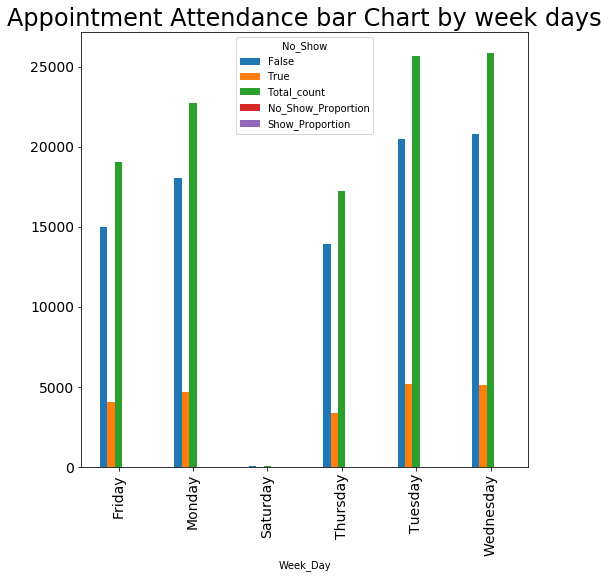

In [57]:
labels = ['Present', 'Absent']
df_Week_Day.plot(kind='bar', fontsize=14, figsize=[8,8])
plt.title('Appointment Attendance bar Chart by week days', fontsize=24);

### Research Question 5: Do people who get SMS reminders have lower no-show rate than those who do not?  

I will divide the dataframe into two seperate dataframes. Those who get SMS reminders (df_SMS) represented by "1" in the "SMS_received" column and those who do not (df_No_SMS) represented by "0" in the "SMS_received" column of the df dataframe

In [58]:
df_SMS = df[df.SMS_received == 1]
df_No_SMS = df[df.SMS_received == 0]

# Display the first few rows of those who showup for their appointment

df_SMS.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                            
5620163          7542951368435      M 2016-04-26 08:44:12   Friday   29   
5620206            99948393975      F 2016-04-26 08:47:27   Friday   15   
5621836         17135378245248      F 2016-04-26 10:54:18   Friday   30   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5620163         NOVA PALESTINA            0             0         0   
5620206         NOVA PALESTINA            0             0         0   
5621836         NOVA PALESTINA            1             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5620163                  0         0             1     True  
5620206                  0         0             1    False  
5621836                  0         0             1    False

In [59]:
df_No_SMS.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5642903          29872499824296      F 2016-04-29 18:38:08   Friday   62   
5642503         558997776694438      M 2016-04-29 16:08:27   Friday   56   
5642549           4262962299951      F 2016-04-29 16:19:04   Friday   62   

                  Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                         
5642903         JARDIM DA PENHA            0             1         0   
5642503         JARDIM DA PENHA            0             0         0   
5642549           MATA DA PRAIA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5642903                  0         0             0    False  
5642503                  0         0             0    False  
5642549                  0         0             0    False

> Patients who recieved an SMS and showed up for appointment df_SMS_Present  
> Patients who recieved an SMS and did not show up for appointment df_SMS_Absent  
> Patients who did not recieved an SMS and showed up for appointment df_No_SMS_Present  
> Patients who did not recieved an SMS and did not show up for appointment df_No_SMS_Absent  

In [60]:
# Patients who recieved an SMS and showed up for appointment
df_SMS_Present = df_SMS[df_SMS.No_Show == 0]

# Patients who recieved an SMS and did not showed up for appointment
df_SMS_Absent = df_SMS[df_SMS.No_Show == 1]

# Patients who did not recieve an SMS and showed up for appointment
df_No_SMS_Present = df_No_SMS[df_No_SMS.No_Show == 0]

# Patients who did not recieved an SMS and did not showed up for appointment
df_No_SMS_Absent = df_No_SMS[df_No_SMS.No_Show == 1]

df_SMS_Present.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                            
5620206            99948393975      F 2016-04-26 08:47:27   Friday   15   
5621836         17135378245248      F 2016-04-26 10:54:18   Friday   30   
5624020          5819369978796      M 2016-04-26 15:04:17   Friday   46   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5620206         NOVA PALESTINA            0             0         0   
5621836         NOVA PALESTINA            1             0         0   
5624020              CONQUISTA            0             1         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5620206                  0         0             1    False  
5621836                  0         0             1    False  
5624020                  0         0             1    False

In [61]:
df_SMS_Absent.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5620163           7542951368435      M 2016-04-26 08:44:12   Friday   29   
5616091         863229818887631      M 2016-04-25 13:29:16   Friday   13   
5618643           8545415176986      F 2016-04-26 07:19:49   Friday   58   

                 Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                        
5620163         NOVA PALESTINA            0             0         0   
5616091              CONQUISTA            0             0         0   
5618643          SÃO CRISTÓVÃO            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5620163                  0         0             1     True  
5616091                  0         0             1     True  
5618643                  0         0             1     True

In [62]:
df_No_SMS_Present.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5642903          29872499824296      F 2016-04-29 18:38:08   Friday   62   
5642503         558997776694438      M 2016-04-29 16:08:27   Friday   56   
5642549           4262962299951      F 2016-04-29 16:19:04   Friday   62   

                  Neighbourhood  Scholarship  Hypertension  Diabetes  \
Appointment_ID                                                         
5642903         JARDIM DA PENHA            0             1         0   
5642503         JARDIM DA PENHA            0             0         0   
5642549           MATA DA PRAIA            0             0         0   

                Alcoholism  Handicap  SMS_received  No_Show  
Appointment_ID                                               
5642903                  0         0             0    False  
5642503                  0         0             0    False  
5642549                  0         0             0    False

In [63]:
df_No_SMS_Absent.head(3)

Patient_ID Gender     Appointment_Day Week_Day  Age  \
Appointment_ID                                                             
5630279         733688164476661      F 2016-04-27 15:05:12   Friday   23   
5630575           3449833394123      F 2016-04-27 15:39:58   Friday   39   
5633460          14794966191172      F 2016-04-28 09:28:57   Friday   40   

               Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
Appointment_ID                                                                  
5630279           GOIABEIRAS            0             0         0           0   
5630575           GOIABEIRAS            0             0         0           0   
5633460            CONQUISTA            1             0         0           0   

                Handicap  SMS_received  No_Show  
Appointment_ID                                   
5630279                0             0     True  
5630575                0             0     True  
5633460                0             0     True

> Let SMS_Present represent the number Patients who recieved an SMS and showed up for appointment 
> Let SMS_Absent represent the number of Patients who recieved an SMS and did not showed up for appointment  
> Let SMS_Total represent the total number of Patients who recieved an SMS for appointment  
> Let SMS_P represent the percentage of Patients who recieved an SMS and showed up for appointment   
> Let SMS_A represent the percentage ofPatients who recieved an SMS and did not showed up for appointment  

In [64]:
SMS_Present = df_SMS_Present.shape[0] # This is the number of rows in df_SMS_Present
SMS_Absent = df_SMS_Absent.shape[0]  # This is the number of rows in df_SMS_Absent
SMS_Total = df_SMS.shape[0]         # This is the number of rows in df_SMS

SMS_P = str(round((SMS_Present / SMS_Total) * 100)) # Make it a string, will be easy to concatenate it with other strings.
SMS_A = str(round((SMS_Absent / SMS_Total) * 100))

print (SMS_A + "% of appointments from patients who recieved an SMS was recorded as no show")
print(SMS_P + "% of appointments from patients who recieved an SMS was recorded as honored")
print(str(SMS_Total) + " is the total number of appointments by patients who recieved an SMS")

28% of appointments from patients who recieved an SMS was recorded as no show
72% of appointments from patients who recieved an SMS was recorded as honored
35482 is the total number of appointments by patients who recieved an SMS


Presenting of the above results in a pie chart

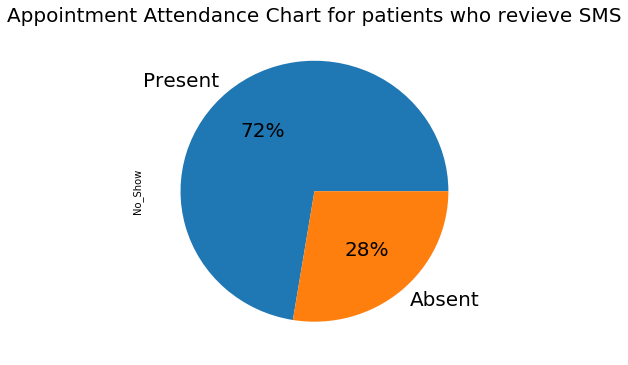

In [65]:
labels = ['Present', 'Absent']
df_SMS.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for patients who revieve SMS', fontsize=20);

> Let No_SMS_Present represent the number Patients who did not recieved an SMS and showed up for appointment 
> Let No_SMS_Absent represent the number of Patients who did not recieved an SMS and did not showed up for appointment  
> Let No_SMS_Total represent the total number of Patients who did not recieved an SMS for appointment  
> Let No_SMS_P represent the percentage of Patients who did not recieved an SMS and showed up for appointment   
> Let No_SMS_A represent the percentage ofPatients who did not recieved an SMS and did not showed up for appointment  

In [66]:
No_SMS_Present = df_No_SMS_Present.shape[0] # This is the number of rows in df_No_SMS_Present
No_SMS_Absent = df_No_SMS_Absent.shape[0]  # This is the number of rows in df_No_SMS_Absent
No_SMS_Total = df_No_SMS.shape[0]         # This is the number of rows in df_SMS

No_SMS_P = str(round((No_SMS_Present / No_SMS_Total) * 100)) # Make it a string, it will be easy to concatenate with strings.
No_SMS_A = str(round((No_SMS_Absent / No_SMS_Total) * 100))

print (No_SMS_A + "% of appointments from patients who did not recieved an SMS was recorded as no show")
print(No_SMS_P + "% of appointments from patients who did not recieved an SMS was recorded as honored")
print(str(No_SMS_Total) + " is the total number of appointments by patients who did not recieved an SMS")

17% of appointments from patients who did not recieved an SMS was recorded as no show
83% of appointments from patients who did not recieved an SMS was recorded as honored
75045 is the total number of appointments by patients who did not recieved an SMS


Presenting of the above results in a pie chart

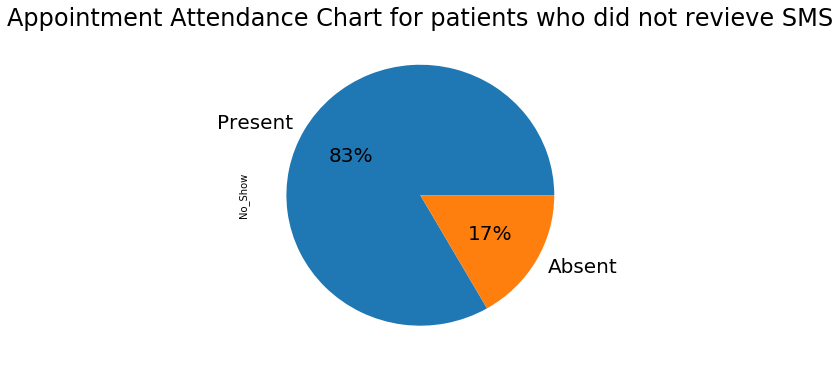

In [67]:
labels = ['Present', 'Absent']
df_No_SMS.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for patients who did not revieve SMS', fontsize=24);

## Conclusions

#### Challenges    
> 1). When I was analysing the no show percentage of patients on the scholarship plan and that of those who recieved an SMS, I was suprised by the results I had because it was contrary to what I thought should be. I thought that these 2 groups of people should have a lower no show rate than those who were not on the scholarship plan and those who did not get the SMS respectively. This made me to redo their respective sections several times because I thought I was the one making an error.   
> 2). I would have love to know why the SMS and Scholarship program had this negative effect but there was no data for that    
> 3). PARQUE INDUSTRIAL Neighbourhood has only 1 appointment. I would have loved to know what was going on there but there was no data to that effect.

Generally, about 20% of all appointments are recorded as no_show while about 80% are honored  

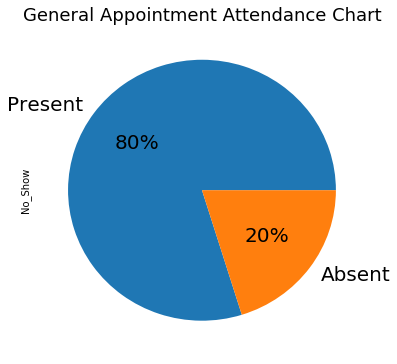

In [68]:
labels = ['Present', 'Absent']
df.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('General Appointment Attendance Chart', fontsize=18);

About 24% of appointments from patients who are on the scholarship program was no show which is higher than the general no show percentage and about 76% of appointments was honored. In total, there were 10861 appointments by patients on scholarship.

On the other hand, about 20% of appointments from patients who are NOT on the scholarship program was recorded as no show which is the same as the general no show percentage and about 80% was honored. In total, there were 99666 appointments by non scholarship patients

The people on the Scholarship program have a higher no show rate than those who are not on the program as seen in the visauls below. Because of insufficient data, I could not dig deeper to find out why this is happening. Maybe more data on cost of healthcare and the financial status for those on the scholarship program and those who are not on the program 

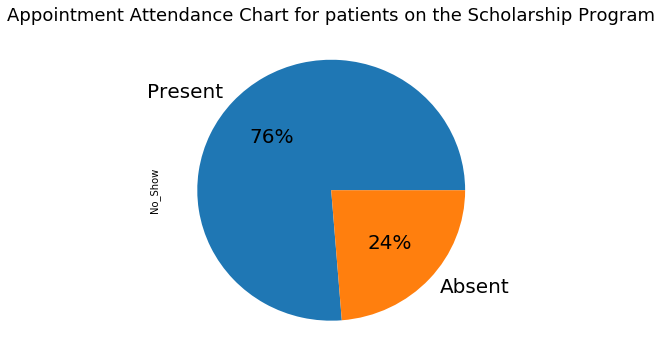

In [69]:
labels = ['Present', 'Absent']
df_Scholarship.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for patients on the Scholarship Program', fontsize=18);

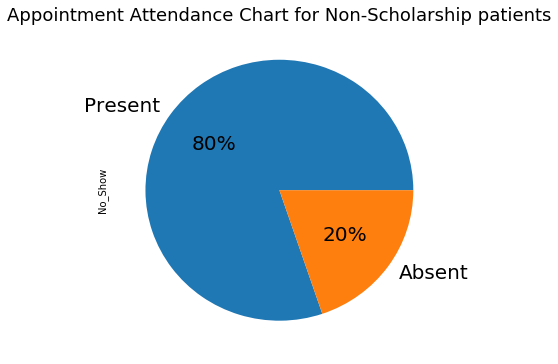

In [70]:
labels = ['Present', 'Absent']
df_No_Scholarship.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for Non-Scholarship patients', fontsize=18);

JARDIM CAMBURI Neighbourhood has 7717 appointments, the highest number of scheduled appointments while PARQUE INDUSTRIAL Neighbourhood has only 1 appointment, the lowest scheduled appointments. More data on the nature of the neighbourhood would have helped to know why this neighbourhood had only 1 appointment

ILHAS OCEÂNICAS DE TRINDADE Neighbourhood has the highest no-show appointments proportion while PARQUE INDUSTRIAL Neighbourhood has the lowest no-show appointments proportion. Also JARDIM CAMBURINeighbourhood with the highest appointment count, has the highest no-show counts

Saturday has 39 appointments, the least number of appointments scheduled by week day. Wednesday has 25867 appointments, the most number of appointments scheduled by week day.Relatively more appointments are scheduled for Tuesday and Wednesday

Thursday has the least no show rate  while Saturday has the highest no show rate. 

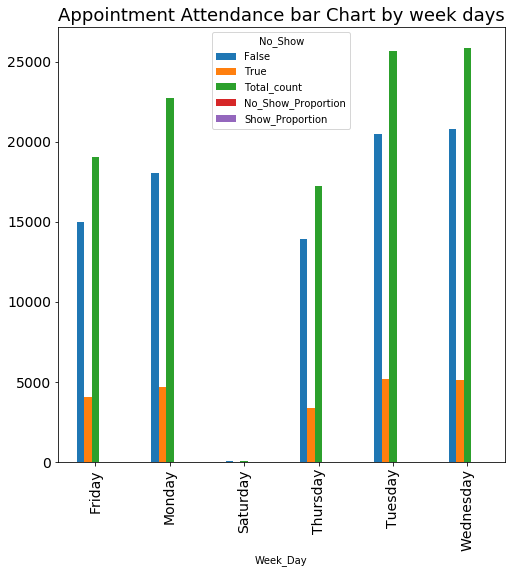

In [71]:
labels = ['Present', 'Absent']
df_Week_Day.plot(kind='bar', fontsize=14, figsize=[8,8])
plt.title('Appointment Attendance bar Chart by week days', fontsize=18);

About 28% of appointments from patients who recieved an SMS was recorded as no show which is higher than the general no show percentage while 72% was honored. Also there were in total 35482 appointments made by patients recieved an SMS.

About 17% of appointments from patients who did not recieved an SMS was recorded as no show which is lower than the general no show percentage while 83% of was recorded as honored. Also there were in total 75045 appointments made by patients who did not recieved an SMS  

The percentage of no show was higher amongst those who got an SMS than amongst those who did not. The lack of data on the content of the SMS limits me from understanding why there was a greater no show rate amongst those who recieved the SMS. 

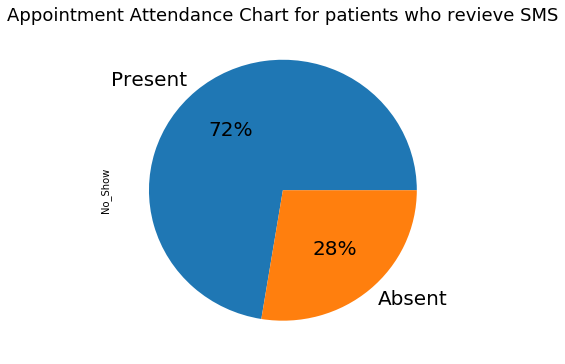

In [72]:
labels = ['Present', 'Absent']
df_SMS.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for patients who revieve SMS', fontsize=18);

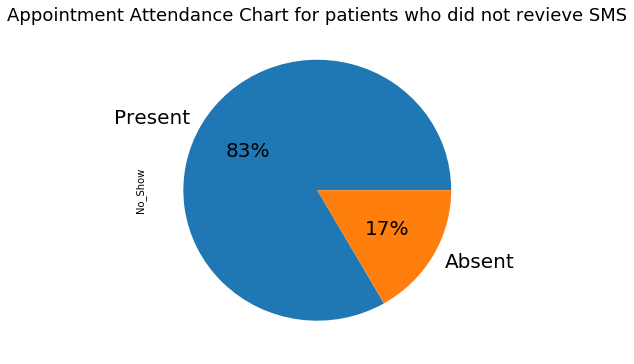

In [73]:
labels = ['Present', 'Absent']
df_No_SMS.No_Show.value_counts(sort=False).plot.pie(autopct='%1.0f%%', 
                                             labels=labels, fontsize=20, figsize=(6, 6))
plt.title('Appointment Attendance Chart for patients who did not revieve SMS', fontsize=18);